Image classification task

we will gather image data from anywhere from the internet. Not from a specified location

How to downbload images from microsoft bing. But it doesnt work. 

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install tornado

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.1MB/s 
     |████████████████████████████████| 1.2MB 18.2MB/s 
     |████████████████████████████████| 194kB 47.4MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 12.8MB 243kB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.


In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import * #widgets are needed to build 
#interfaces that can be used later by other people to use your neuronetwork/program


In [5]:
!curl https://course19.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   1319      0 --:--:-- --:--:-- --:--:--  1314
Updating fastai...
Done.


**HOW TO GET IMAGE DATA FROM GOOGLE**

1. search for labradors on google images
2. All the images wont be of labs. need to cleant he data
3. First step, save the url of images in a file
4. Then, we download the files from those urls

Ctrl Shift J - Console window. paste the below code and it will download a file with all the urls
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl')); window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

Save the file as csv file and save it in the google drive

Now we will read the url and download the images and save them in respective folders


In [60]:
#CODE TO GET THE IMAGES FROM THE URLS
path = Path('gdrive/My Drive/Data/bears')
teddyfolder = 'teddybear'
teddydest = path/teddyfolder
teddy_url_file = path/'teddybear.csv'

In [61]:
path

Path('gdrive/My Drive/Data/bears')

In [ ]:
blackfolder = 'blackbear'
blackdest = path/blackfolder
black_url_file = path/'blackbear.csv'

In [ ]:
grizzlyfolder = 'grizzlybear'
grizzlydest = path/grizzlyfolder
grizzly_url_file = path/'grizzlybear.csv'

In [ ]:
#downloading the image files in the designated folder
download_images(teddydest, teddy_url_file, max_pics=300)

In [ ]:
download_images(blackdest, black_url_file, max_pics=300)

In [ ]:
download_images(grizzlydest, grizzly_url_file, max_pics=300)

The folder names are used to categorize the images

The folder name is the label or the class

Using the name of the folder to label the data is the most preferred way

We need to put the data into a list of files


In [ ]:
#to feed the data to the neuro network, we need the list of the file names
#we need to present the whole table of data to the neronet. 

fns_black = get_image_files(path/blackfolder)
fns_black

(#228) [Path('gdrive/My Drive/Data/bears/blackbear/00000007.jpg'),Path('gdrive/My Drive/Data/bears/blackbear/00000005.jpg'),Path('gdrive/My Drive/Data/bears/blackbear/00000006.jpg'),Path('gdrive/My Drive/Data/bears/blackbear/00000008.jpg'),Path('gdrive/My Drive/Data/bears/blackbear/00000009.jpg'),Path('gdrive/My Drive/Data/bears/blackbear/00000011.jpg'),Path('gdrive/My Drive/Data/bears/blackbear/00000014.jpg'),Path('gdrive/My Drive/Data/bears/blackbear/00000010.jpg'),Path('gdrive/My Drive/Data/bears/blackbear/00000013.jpg'),Path('gdrive/My Drive/Data/bears/blackbear/00000012.jpg')...]

In [ ]:
fns_teddy = get_image_files(path/teddyfolder)
fns_teddy

(#205) [Path('gdrive/My Drive/Data/bears/teddybear/00000000.jpg'),Path('gdrive/My Drive/Data/bears/teddybear/00000003.jpg'),Path('gdrive/My Drive/Data/bears/teddybear/00000002.jpg'),Path('gdrive/My Drive/Data/bears/teddybear/00000007.jpg'),Path('gdrive/My Drive/Data/bears/teddybear/00000006.jpg'),Path('gdrive/My Drive/Data/bears/teddybear/00000004.jpg'),Path('gdrive/My Drive/Data/bears/teddybear/00000009.jpg'),Path('gdrive/My Drive/Data/bears/teddybear/00000005.jpg'),Path('gdrive/My Drive/Data/bears/teddybear/00000010.jpg'),Path('gdrive/My Drive/Data/bears/teddybear/00000011.jpg')...]

In [ ]:
fns_grizzly = get_image_files(path/grizzlyfolder)
fns_grizzly

(#228) [Path('gdrive/My Drive/Data/bears/grizzlybear/00000155.jpg'),Path('gdrive/My Drive/Data/bears/grizzlybear/00000279.jpg'),Path('gdrive/My Drive/Data/bears/grizzlybear/00000001.jpg'),Path('gdrive/My Drive/Data/bears/grizzlybear/00000003.jpg'),Path('gdrive/My Drive/Data/bears/grizzlybear/00000000.jpg'),Path('gdrive/My Drive/Data/bears/grizzlybear/00000007.jpg'),Path('gdrive/My Drive/Data/bears/grizzlybear/00000002.jpg'),Path('gdrive/My Drive/Data/bears/grizzlybear/00000005.jpg'),Path('gdrive/My Drive/Data/bears/grizzlybear/00000004.jpg'),Path('gdrive/My Drive/Data/bears/grizzlybear/00000009.jpg')...]

In [62]:
path.ls()

(#6) [Path('gdrive/My Drive/Data/bears/grizzlybear.csv'),Path('gdrive/My Drive/Data/bears/teddybear.csv'),Path('gdrive/My Drive/Data/bears/blackbear.csv'),Path('gdrive/My Drive/Data/bears/blackbear'),Path('gdrive/My Drive/Data/bears/teddybear'),Path('gdrive/My Drive/Data/bears/grizzlybear')]

In [8]:
fns = get_image_files(path)
fns
len(fns)

659

In [ ]:
#to look for corrupt files
failed = verify_images(fns_black)
failed

(#0) []

In [ ]:
failed = verify_images(fns_teddy)
failed

(#0) []

In [ ]:
failed = verify_images(fns_grizzly)
failed


(#0) []

In [63]:
#now we need to build a data loader
#they will contain all data that is needed to train the neuronet

class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [64]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [65]:
path

Path('gdrive/My Drive/Data/bears')

In [66]:
dls = bears.dataloaders(path)

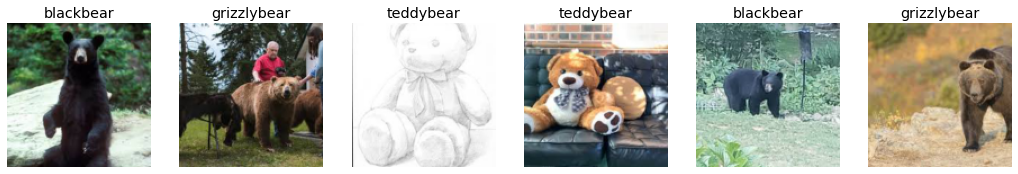

In [14]:
dls.valid.show_batch(max_n=6, nrows=1)

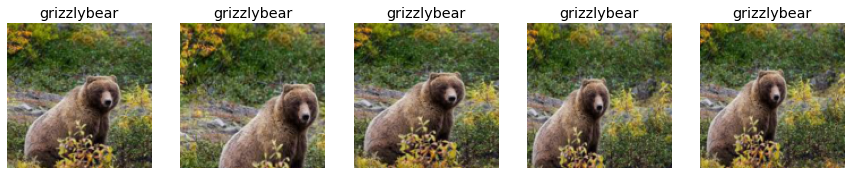

In [15]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=5, nrows=1, unique=True)

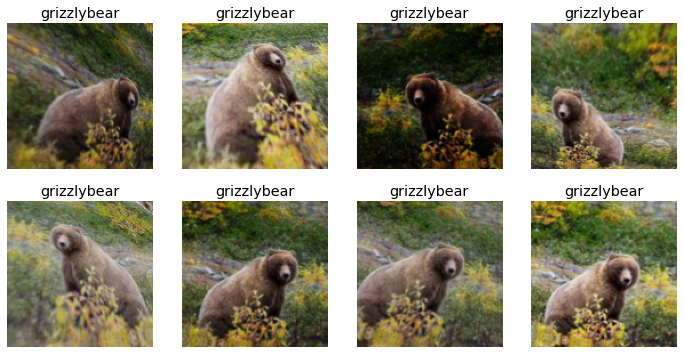

In [16]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [17]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

**Data augmentation** refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes

**QUESTION**
what are the acceptable measures for train_loss, valid_loss and error_rate?

In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

In [24]:
#using resnet 34 brought down the error rate significantly. So I used resnet 34 to train my model
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6)

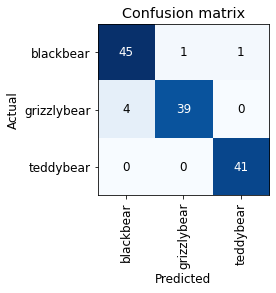

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

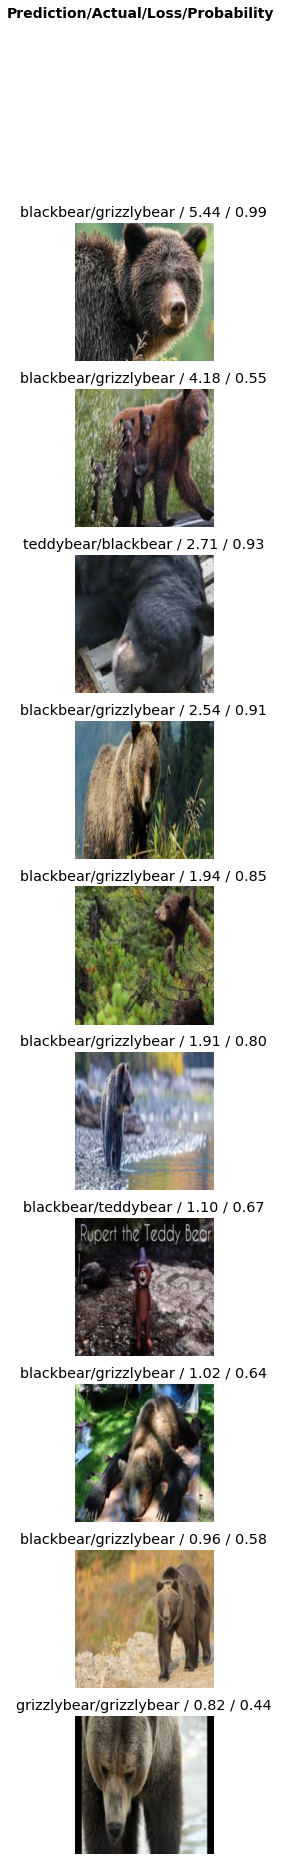

In [23]:
interp.plot_top_losses(10, nrows=10)

In [ ]:
#hide_output

cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#deleting images that do not fit in the data
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
#getting an error because a same name file already exists in the other category folder. How to solve this problem? I have been changing
#the file name manually in the folder so that the new image with the same name can move in.

for idx,cat in cleaner.change(): 
  shutil.move(str(cleaner.fns[idx]), path/cat)


THETA

Theta is not determined initially. We train the function data in the neuronet. We need to fix the function. 


In [26]:
learn.export()

In [67]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [68]:
learn_inf = load_learner(path/'export.pkl')

In [69]:
learn_inf.dls.vocab

['blackbear', 'grizzlybear', 'teddybear']

In [70]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [72]:
img = PILImage.create(btn_upload.data[-1])

In [73]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [74]:
pred,pred_idx,probs = learn_inf.predict(img)

In [75]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: blackbear; Probability: 0.9971')

In [76]:
#pred,pred_idx,probs = learn_inf.predict(img)
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')

In [77]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[0])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [78]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [1]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 2.5 MB 4.0 MB/s eta 0:00:01
Enabling: voila
- Writing config: /srv/conda/envs/notebook/etc/jupyter
    - Validating...
      voila 0.2.7 OK
